In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    column_type = data[column].dtype
    if column_type == 'object':  
                data[column] = LabelEncoder().fit_transform(data[column])
    elif column_type == 'int64' or column_type == 'float64':
            data[column] = data[column].fillna(data[column].mean())

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [8]:
x = data.drop(['SalePrice'],axis = 1)
y = data['SalePrice']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,0,3,4,4,0,9,2008,8,4
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,0,3,4,4,0,2,2006,8,0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,0,3,4,4,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,0,3,2,4,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,0,3,0,2,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,0,3,4,4,0,4,2010,8,4


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1168, 80)
X_test: (292, 80)
Y_train: (1168,)
Y_test: (292,)


In [15]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([ 220756.91903354,  171303.93973366,   98089.81961124,
        214496.2746434 ,   94311.8965668 ,   81998.88953967,
        237174.34119909,  139909.86807208,  431569.07956673,
        163102.78164442,  194499.04401226,  -49549.71072138,
        252369.60961729,  110512.26198928,  122067.94903465,
        139160.7458203 ,  238580.53340151,  116490.28520768,
        131251.43402847,  173076.84608204,  142279.04349523,
        157104.09505863,   78352.45661567,  152154.27117074,
        200352.89787132,  193633.21404988,  170698.93080512,
         65296.9216342 ,  353074.31531273,  114454.13290442,
        134655.84766486,  214415.49136673,  149227.05289821,
        283368.93011552,  312905.34416097,  188086.87326275,
        303236.70373461,  111269.99529672,  230168.19974109,
        334530.58205951,  214330.03987085,  100427.10365677,
        201746.87580885,  294708.18353084,  336400.97387623,
        121182.01073722, -113476.58307272,  112019.67368696,
        172043.30833097,

In [19]:
error = mae(y_test, y_pred) 
print("Mean absolute error : " + str(error)) 

Mean absolute error : 24718.80539218913


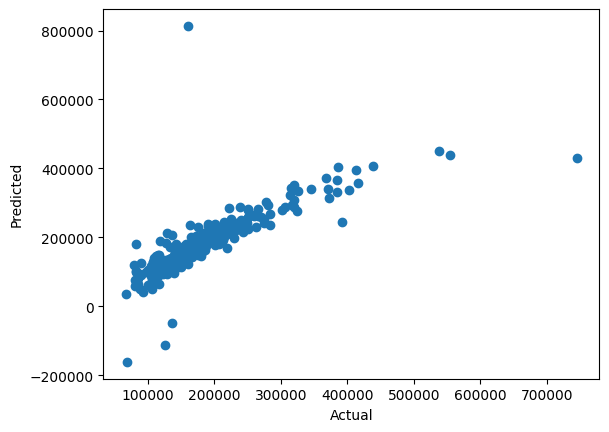

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

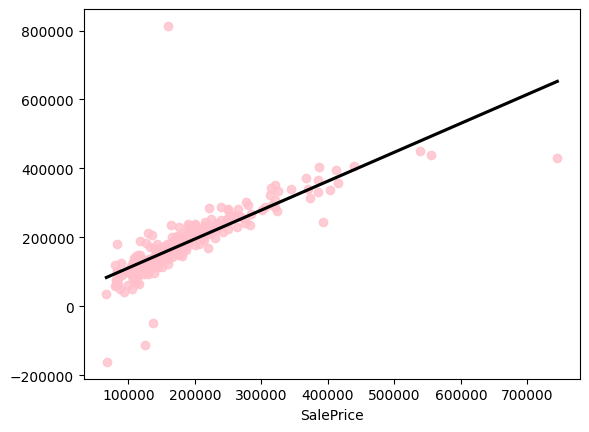

In [31]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='black', 
            scatter_kws={'color': 'pink'})
plt.show()

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
529,200624,220756.919034,-20132.919034
491,133000,171303.939734,-38303.939734
459,110000,98089.819611,11910.180389
279,192000,214496.274643,-22496.274643
655,88000,94311.896567,-6311.896567
...,...,...,...
326,324000,277514.489335,46485.510665
440,555000,438474.320250,116525.679750
1387,136000,207985.219065,-71985.219065
1323,82500,102612.161645,-20112.161645
